Genome tags:

1058: Unintentionally funny 
933: So bad its funny
934: So bad its good
891: Scifi cult
616: Low budget
274: Cult
275: Cult classic
276: Cult film
198: Cheesy


1. Content based recommendation system using plot summaries vectorized and run through TF-IDF. 
2. Collaboration based rec system using item to item comparison of movie IDs and ratings from users. Back pocket. 
3. Weight so bad its good movies heavier.
4. https://github.com/spotify/annoy


In [3]:
import pandas as pd
import numpy as np

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
!pip install pandas_profiling

     |████████████████████████████████| 133kB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 614kB 5.1MB/s eta 0:00:01


  Stored in directory: /Users/jmcneilkeller/Library/Caches/pip/wheels/45/10/b5/5565b02c204a3bb87490a22e0e4c382ea06337bb79fd74d58a
  Stored in directory: /Users/jmcneilkeller/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /Users/jmcneilkeller/Library/Caches/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [173]:
import pandas_profiling

In [90]:
import sqlite3

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
ratings = pd.read_csv('ml-latest/ratings.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [7]:
collab_test = ratings.drop('timestamp',axis=1)

In [8]:
collab_test.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [9]:
movies = pd.read_csv('ml-latest/movies.csv')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [11]:
tags = pd.read_csv('ml-latest/tags.csv')

In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
userId       1108997 non-null int64
movieId      1108997 non-null int64
tag          1108981 non-null object
timestamp    1108997 non-null int64
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [13]:
g_tags = pd.read_csv('ml-latest/genome-tags.csv')

In [14]:
g_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


In [15]:
links = pd.read_csv('ml-latest/links.csv')

In [16]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
imdbId     58098 non-null int64
tmdbId     57917 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [17]:
g_scores = pd.read_csv('ml-latest/genome-scores.csv')

In [18]:
g_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


In [19]:
movies.movieId[37258]

146485

In [20]:
links.imdbId.max()

9038520

In [21]:
df_master = movies.merge(links,on='movieId')
df_master.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [22]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
imdbId     58098 non-null int64
tmdbId     57917 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [23]:
def imdb_correcter(i):
    if len(str(i)) > 0:
        return 'tt' + '0'*(7-len(str(i))) + str(i)

In [24]:
# Updating 
df_master['imdbId'] = df_master.imdbId.apply(imdb_correcter)

In [25]:
df_master['imdbId']

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
5        tt0113277
6        tt0114319
7        tt0112302
8        tt0114576
9        tt0113189
10       tt0112346
11       tt0112896
12       tt0112453
13       tt0113987
14       tt0112760
15       tt0112641
16       tt0114388
17       tt0113101
18       tt0112281
19       tt0113845
20       tt0113161
21       tt0112722
22       tt0112401
23       tt0114168
24       tt0113627
25       tt0114057
26       tt0114011
27       tt0114117
28       tt0112682
29       tt0115012
30       tt0112792
31       tt0114746
32       tt0114952
33       tt0112431
34       tt0112637
35       tt0112818
36       tt0112286
37       tt0113442
38       tt0112697
39       tt0112749
40       tt0114279
41       tt0112819
42       tt0114272
43       tt0113855
44       tt0114681
45       tt0113347
46       tt0114369
47       tt0114148
48       tt0114916
49       tt0114814
50       tt0109950
51       tt0113819
52       tt0

In [26]:
df_master['tmdbId'] = df_master['tmdbId'].astype('object')
df_master['tmdbId']

0           862
1          8844
2         15602
3         31357
4         11862
5           949
6         11860
7         45325
8          9091
9           710
10         9087
11        12110
12        21032
13        10858
14         1408
15          524
16         4584
17            5
18         9273
19        11517
20         8012
21         1710
22         9691
23        12665
24          451
25        16420
26         9263
27        17015
28          902
29        37557
30         9909
31           63
32        78802
33         9598
34        47018
35          687
36       139405
37        33689
38         9603
39        34615
40        31174
41        11443
42        35196
43         9312
44          577
45        11861
46          807
47        10530
48         8391
49          629
50       117164
51        11448
52        49133
53        26441
54        97406
55       124057
56         9089
57        11010
58        99040
59        11359
60        17182
61         2054
62      

In [27]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
imdbId     58098 non-null object
tmdbId     57917 non-null object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [28]:
df_master.loc[df_master.movieId == 1]

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862


In [29]:
g_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


In [30]:
g_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [31]:
g_scores.head(100)

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000
5,1,6,0.19525
6,1,7,0.07600
7,1,8,0.25200
8,1,9,0.22750
9,1,10,0.02400


In [91]:
conn = sqlite3.connect('goodbad.db')
cur = conn.cursor()

In [92]:
ratings.to_sql('ratings', conn, if_exists='append', index=False)

In [97]:
g_tags.to_sql('genome_tags', conn, if_exists='append', index=False)

In [99]:
g_scores.to_sql('genome_scores', conn, if_exists='append', index=False)

In [100]:
movies.to_sql('movies', conn, if_exists='append', index=False)

In [101]:
tags.to_sql('tags', conn, if_exists='append', index=False)

In [102]:
links.to_sql('links', conn, if_exists='append', index=False)

In [32]:
ratings.rename(columns={'userId':'count'},inplace=True)

In [33]:
ratings.drop(['timestamp'],inplace=True,axis=1)

In [34]:
ratbin = ratings.groupby(['movieId','rating']).count()

In [219]:
print(ratbin.loc[[ratbin.index.get_level_values(0)[10]]])

                count
movieId rating       
2       0.5       276
        1.0       813
        1.5       542
        2.0      2551
        2.5      1902
        3.0      8711
        3.5      3116
        4.0      6303
        4.5       790
        5.0      2139


In [35]:
ratbin.head()

count
movieId rating       
1       0.5       478
        1.0       840
        1.5       468
        2.0      2160
        2.5      1665

In [36]:
unstack = ratbin.unstack()
unstack.head()

count                                                          \
rating     0.5    1.0    1.5     2.0     2.5      3.0     3.5      4.0   
movieId                                                                  
1        478.0  840.0  468.0  2160.0  1665.0  11872.0  6095.0  22710.0   
2        276.0  813.0  542.0  2551.0  1902.0   8711.0  3116.0   6303.0   
3        174.0  777.0  237.0  1677.0   629.0   6227.0   774.0   3440.0   
4         48.0  352.0   31.0   497.0    77.0   1136.0    68.0    557.0   
5        248.0  802.0  282.0  1737.0   681.0   6655.0   761.0   2989.0   

                          
rating      4.5      5.0  
movieId                   
1        5684.0  16497.0  
2         790.0   2139.0  
3         159.0   1491.0  
4          12.0    211.0  
5         174.0   1145.0

In [37]:
unstack.isnull().sum()

       rating
count  0.5       30889
       1.0       33213
       1.5       34230
       2.0       27150
       2.5       23590
       3.0       16780
       3.5       19136
       4.0       21634
       4.5       30302
       5.0       29680
dtype: int64

In [38]:
df_master = df_master.merge(unstack,on='movieId')

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [39]:
df_master.isnull().sum()

movieId             0
title               0
genres              0
imdbId              0
tmdbId            177
(count, 0.5)    30889
(count, 1.0)    33213
(count, 1.5)    34230
(count, 2.0)    27150
(count, 2.5)    23590
(count, 3.0)    16780
(count, 3.5)    19136
(count, 4.0)    21634
(count, 4.5)    30302
(count, 5.0)    29680
dtype: int64

In [40]:
df_master.head(10)

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)"
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0
5,6,Heat (1995),Action|Crime|Thriller,tt0113277,949,53.0,339.0,71.0,1013.0,415.0,6740.0,1994.0,9613.0,2296.0,6149.0
6,7,Sabrina (1995),Comedy|Romance,tt0114319,11860,141.0,409.0,155.0,1186.0,489.0,5978.0,748.0,4122.0,253.0,1820.0
7,8,Tom and Huck (1995),Adventure|Children,tt0112302,45325,14.0,87.0,13.0,181.0,55.0,669.0,60.0,318.0,13.0,129.0
8,9,Sudden Death (1995),Action,tt0114576,9091,25.0,310.0,59.0,587.0,148.0,2089.0,90.0,853.0,17.0,271.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,tt0113189,710,166.0,632.0,226.0,2038.0,1058.0,12189.0,2882.0,9909.0,912.0,3074.0


In [41]:
tags = [1058,933,934,891,616,274,275,276,198]
g_rev = g_scores.loc[g_scores['tagId'].isin(tags)]
g_rev.head()


,movieId,tagId,relevance
197,1,198,0.07500
273,1,274,0.21400
274,1,275,0.30725
275,1,276,0.21925
615,1,616,0.07300


In [42]:
g_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118584 entries, 197 to 14862457
Data columns (total 3 columns):
movieId      118584 non-null int64
tagId        118584 non-null int64
relevance    118584 non-null float64
dtypes: float64(1), int64(2)
memory usage: 3.6 MB


In [150]:
g_rev.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [43]:
g_test = g_rev.pivot(index='movieId',columns='tagId',values='relevance')
g_test.head(100)

tagId,198,274,275,276,616,891,933,934,1058
movieId,,,,,,,,,
1,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875
2,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200
3,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425
4,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725
5,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850
6,0.02825,0.15575,0.36400,0.40450,0.06575,0.04675,0.15225,0.01675,0.02250
7,0.09875,0.02550,0.11000,0.14500,0.01825,0.03275,0.23550,0.03175,0.04775
8,0.06325,0.02575,0.07950,0.19175,0.02675,0.02100,0.26150,0.01950,0.02725
9,0.17800,0.02500,0.11650,0.18300,0.03300,0.02550,0.50225,0.05100,0.07700


In [149]:
g_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 1 to 187595
Data columns (total 9 columns):
198     13176 non-null float64
274     13176 non-null float64
275     13176 non-null float64
276     13176 non-null float64
616     13176 non-null float64
891     13176 non-null float64
933     13176 non-null float64
934     13176 non-null float64
1058    13176 non-null float64
dtypes: float64(9)
memory usage: 1.0 MB


In [59]:
g_tag_test = df_master.merge(g_test, on='movieId', )
g_tag_test.head()

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",198,274,275,276,616,891,933,934,1058
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850


In [60]:
g_tag_test.isnull().sum()

movieId            0
title              0
genres             0
imdbId             0
tmdbId            17
(count, 0.5)     736
(count, 1.0)     865
(count, 1.5)    1299
(count, 2.0)     151
(count, 2.5)      99
(count, 3.0)       2
(count, 3.5)      49
(count, 4.0)      10
(count, 4.5)     490
(count, 5.0)     214
198                0
274                0
275                0
276                0
616                0
891                0
933                0
934                0
1058               0
dtype: int64

In [61]:
g_tag_test.describe()

,movieId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",198,274,275,276,616,891,933,934,1058
count,13176.000000,12440.000000,12311.000000,11877.000000,13025.000000,13077.000000,13174.000000,13127.000000,13166.000000,12686.000000,12962.000000,13176.000000,13176.000000,13176.000000,13176.00000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,39970.868549,34.110450,70.896434,36.210996,140.096430,102.356657,413.408911,254.531195,557.373234,185.417626,312.359667,0.092009,0.125118,0.246457,0.28432,0.127759,0.059628,0.291982,0.035529,0.037644
std,48151.129249,80.622654,182.791444,82.185694,338.208791,226.199578,1113.128833,621.079637,1649.334703,674.527451,1437.243790,0.106802,0.133213,0.200088,0.15842,0.151946,0.075956,0.164562,0.058301,0.055112
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007250,0.006250,0.018000,0.06175,0.007000,0.004750,0.051000,0.003000,0.005250
25%,3680.750000,3.000000,4.000000,3.000000,8.000000,8.000000,22.000000,18.000000,22.000000,6.000000,8.000000,0.030000,0.041000,0.110750,0.17925,0.041750,0.028500,0.169750,0.011750,0.014000
50%,7880.000000,7.000000,12.000000,8.000000,24.000000,21.000000,66.000000,45.000000,69.000000,20.000000,25.000000,0.052125,0.075500,0.171750,0.23475,0.072625,0.039000,0.239250,0.018250,0.020000
75%,71249.000000,25.000000,54.000000,28.000000,107.000000,78.000000,277.750000,169.000000,308.000000,86.000000,115.000000,0.107000,0.155750,0.306875,0.33400,0.142250,0.057500,0.372250,0.034500,0.036500
max,187595.000000,1132.000000,4339.000000,1219.000000,5687.000000,3016.000000,22333.000000,7373.000000,28340.000000,14110.000000,48762.000000,0.847000,0.968000,0.994500,0.99325,0.988250,1.000000,0.952500,0.897500,0.806750


In [62]:
g_tag_test['total_count'] = g_tag_test.iloc[:,5:15].sum(axis=1)
g_tag_test.head()

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",198,274,275,276,616,891,933,934,1058,total_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875,68469.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200,27143.0
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425,15585.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725,2989.0
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850,15474.0


In [63]:
g_tag_test.describe()

,movieId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",198,274,275,276,616,891,933,934,1058,total_count
count,13176.000000,12440.000000,12311.000000,11877.000000,13025.000000,13077.000000,13174.000000,13127.000000,13166.000000,12686.000000,12962.000000,13176.000000,13176.000000,13176.000000,13176.00000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,39970.868549,34.110450,70.896434,36.210996,140.096430,102.356657,413.408911,254.531195,557.373234,185.417626,312.359667,0.092009,0.125118,0.246457,0.28432,0.127759,0.059628,0.291982,0.035529,0.037644,2080.856254
std,48151.129249,80.622654,182.791444,82.185694,338.208791,226.199578,1113.128833,621.079637,1649.334703,674.527451,1437.243790,0.106802,0.133213,0.200088,0.15842,0.151946,0.075956,0.164562,0.058301,0.055112,5655.243811
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007250,0.006250,0.018000,0.06175,0.007000,0.004750,0.051000,0.003000,0.005250,48.000000
25%,3680.750000,3.000000,4.000000,3.000000,8.000000,8.000000,22.000000,18.000000,22.000000,6.000000,8.000000,0.030000,0.041000,0.110750,0.17925,0.041750,0.028500,0.169750,0.011750,0.014000,118.000000
50%,7880.000000,7.000000,12.000000,8.000000,24.000000,21.000000,66.000000,45.000000,69.000000,20.000000,25.000000,0.052125,0.075500,0.171750,0.23475,0.072625,0.039000,0.239250,0.018250,0.020000,345.000000
75%,71249.000000,25.000000,54.000000,28.000000,107.000000,78.000000,277.750000,169.000000,308.000000,86.000000,115.000000,0.107000,0.155750,0.306875,0.33400,0.142250,0.057500,0.372250,0.034500,0.036500,1354.000000
max,187595.000000,1132.000000,4339.000000,1219.000000,5687.000000,3016.000000,22333.000000,7373.000000,28340.000000,14110.000000,48762.000000,0.847000,0.968000,0.994500,0.99325,0.988250,1.000000,0.952500,0.897500,0.806750,97999.000000


In [64]:
g_tag_test.rename(columns={198:'Cheesy',274:'Cult',275:'Cult Classic',276:'Cult Film',616:'Low Budget',
                           891:'Scifi Cult',934:'So bad its good',933:'So bad its funny',1058:'Unintentionally funny'}, inplace=True)
g_tag_test.columns

Index([              'movieId',                 'title',
                      'genres',                'imdbId',
                      'tmdbId',          ('count', 0.5),
                ('count', 1.0),          ('count', 1.5),
                ('count', 2.0),          ('count', 2.5),
                ('count', 3.0),          ('count', 3.5),
                ('count', 4.0),          ('count', 4.5),
                ('count', 5.0),                'Cheesy',
                        'Cult',          'Cult Classic',
                   'Cult Film',            'Low Budget',
                  'Scifi Cult',      'So bad its funny',
             'So bad its good', 'Unintentionally funny',
                 'total_count'],
      dtype='object')

In [65]:
g_tag_test.head()

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875,68469.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200,27143.0
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425,15585.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725,2989.0
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850,15474.0


In [66]:
g_tag_test['percent_0.5to1'] = (g_tag_test.iloc[:,[5,6]].sum(axis=1)) / g_tag_test['total_count']
g_tag_test['percent_4.5to5'] = (g_tag_test.iloc[:,[13,14]].sum(axis=1)) / g_tag_test['total_count']
g_tag_test.head()

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875,68469.0,0.019250,0.323957
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200,27143.0,0.040121,0.107910
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425,15585.0,0.061020,0.105871
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725,2989.0,0.133824,0.074607
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850,15474.0,0.067856,0.085240


In [53]:
g_tag_test.head(300)

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875,68469.0,0.019250,0.323957
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200,27143.0,0.040121,0.107910
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425,15585.0,0.061020,0.105871
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725,2989.0,0.133824,0.074607
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850,15474.0,0.067856,0.085240
5,6,Heat (1995),Action|Crime|Thriller,tt0113277,949,53.0,339.0,71.0,1013.0,415.0,6740.0,1994.0,9613.0,2296.0,6149.0,0.02825,0.15575,0.36400,0.40450,0.06575,0.04675,0.15225,0.01675,0.02250,28683.0,0.013667,0.294425
6,7,Sabrina (1995),Comedy|Romance,tt0114319,11860,141.0,409.0,155.0,1186.0,489.0,5978.0,748.0,4122.0,253.0,1820.0,0.09875,0.02550,0.11000,0.14500,0.01825,0.03275,0.23550,0.03175,0.04775,15301.0,0.035945,0.135481
7,8,Tom and Huck (1995),Adventure|Children,tt0112302,45325,14.0,87.0,13.0,181.0,55.0,669.0,60.0,318.0,13.0,129.0,0.06325,0.02575,0.07950,0.19175,0.02675,0.02100,0.26150,0.01950,0.02725,1539.0,0.065627,0.092268
8,9,Sudden Death (1995),Action,tt0114576,9091,25.0,310.0,59.0,587.0,148.0,2089.0,90.0,853.0,17.0,271.0,0.17800,0.02500,0.11650,0.18300,0.03300,0.02550,0.50225,0.05100,0.07700,4449.0,0.075298,0.064734
9,10,GoldenEye (1995),Action|Adventure|Thriller,tt0113189,710,166.0,632.0,226.0,2038.0,1058.0,12189.0,2882.0,9909.0,912.0,3074.0,0.13250,0.06900,0.11075,0.16375,0.04550,0.18600,0.19325,0.02875,0.08425,33086.0,0.024119,0.120474


In [69]:
g_tag_test['tmdbId'].fillna(value='N/A',inplace=True)
g_tag_test.isnull().sum()

movieId                     0
title                       0
genres                      0
imdbId                      0
tmdbId                      0
(count, 0.5)              736
(count, 1.0)              865
(count, 1.5)             1299
(count, 2.0)              151
(count, 2.5)               99
(count, 3.0)                2
(count, 3.5)               49
(count, 4.0)               10
(count, 4.5)              490
(count, 5.0)              214
Cheesy                      0
Cult                        0
Cult Classic                0
Cult Film                   0
Low Budget                  0
Scifi Cult                  0
So bad its funny            0
So bad its good             0
Unintentionally funny       0
total_count                 0
percent_0.5to1              0
percent_4.5to5              0
dtype: int64

In [70]:
g_tag_test.fillna(value=0,inplace=True)
g_tag_test.isnull().sum()

movieId                  0
title                    0
genres                   0
imdbId                   0
tmdbId                   0
(count, 0.5)             0
(count, 1.0)             0
(count, 1.5)             0
(count, 2.0)             0
(count, 2.5)             0
(count, 3.0)             0
(count, 3.5)             0
(count, 4.0)             0
(count, 4.5)             0
(count, 5.0)             0
Cheesy                   0
Cult                     0
Cult Classic             0
Cult Film                0
Low Budget               0
Scifi Cult               0
So bad its funny         0
So bad its good          0
Unintentionally funny    0
total_count              0
percent_0.5to1           0
percent_4.5to5           0
dtype: int64

In [71]:
g_tag_test['percent_polarity'] = g_tag_test['percent_0.5to1'] - g_tag_test['percent_4.5to5']
g_tag_test.head(20)

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5,percent_polarity
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875,68469.0,0.019250,0.323957,-0.304707
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200,27143.0,0.040121,0.107910,-0.067789
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425,15585.0,0.061020,0.105871,-0.044851
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725,2989.0,0.133824,0.074607,0.059217
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850,15474.0,0.067856,0.085240,-0.017384
5,6,Heat (1995),Action|Crime|Thriller,tt0113277,949,53.0,339.0,71.0,1013.0,415.0,6740.0,1994.0,9613.0,2296.0,6149.0,0.02825,0.15575,0.36400,0.40450,0.06575,0.04675,0.15225,0.01675,0.02250,28683.0,0.013667,0.294425,-0.280759
6,7,Sabrina (1995),Comedy|Romance,tt0114319,11860,141.0,409.0,155.0,1186.0,489.0,5978.0,748.0,4122.0,253.0,1820.0,0.09875,0.02550,0.11000,0.14500,0.01825,0.03275,0.23550,0.03175,0.04775,15301.0,0.035945,0.135481,-0.099536
7,8,Tom and Huck (1995),Adventure|Children,tt0112302,45325,14.0,87.0,13.0,181.0,55.0,669.0,60.0,318.0,13.0,129.0,0.06325,0.02575,0.07950,0.19175,0.02675,0.02100,0.26150,0.01950,0.02725,1539.0,0.065627,0.092268,-0.026641
8,9,Sudden Death (1995),Action,tt0114576,9091,25.0,310.0,59.0,587.0,148.0,2089.0,90.0,853.0,17.0,271.0,0.17800,0.02500,0.11650,0.18300,0.03300,0.02550,0.50225,0.05100,0.07700,4449.0,0.075298,0.064734,0.010564
9,10,GoldenEye (1995),Action|Adventure|Thriller,tt0113189,710,166.0,632.0,226.0,2038.0,1058.0,12189.0,2882.0,9909.0,912.0,3074.0,0.13250,0.06900,0.11075,0.16375,0.04550,0.18600,0.19325,0.02875,0.08425,33086.0,0.024119,0.120474,-0.096355


In [82]:
g_tag_test['total_tails'] = g_tag_test['percent_0.5to1'] + g_tag_test['percent_4.5to5']

In [91]:
g_tag_test.loc[g_tag_test.imdbId == 'tt0060666']

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5,percent_polarity,total_tails
7291,26157,Manos: The Hands of Fate (1966),Horror,tt0060666,22293,40.0,15.0,3.0,12.0,3.0,5.0,4.0,5.0,4.0,9.0,0.206,0.813,0.67775,0.8445,0.5805,0.102,0.918,0.8575,0.80675,100.0,0.55,0.13,0.42,0.68


In [74]:
def heatmap_corr(dataframe):
    # Plots a heatmap of correlation between features with masking.
    fig, ax = plt.subplots(figsize=(20,20))
    mask=np.zeros_like(dataframe.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    color_map = sns.color_palette("hot_r")
    ax = sns.heatmap(dataframe.corr(), cmap = color_map, mask=mask, square=True, annot=True)

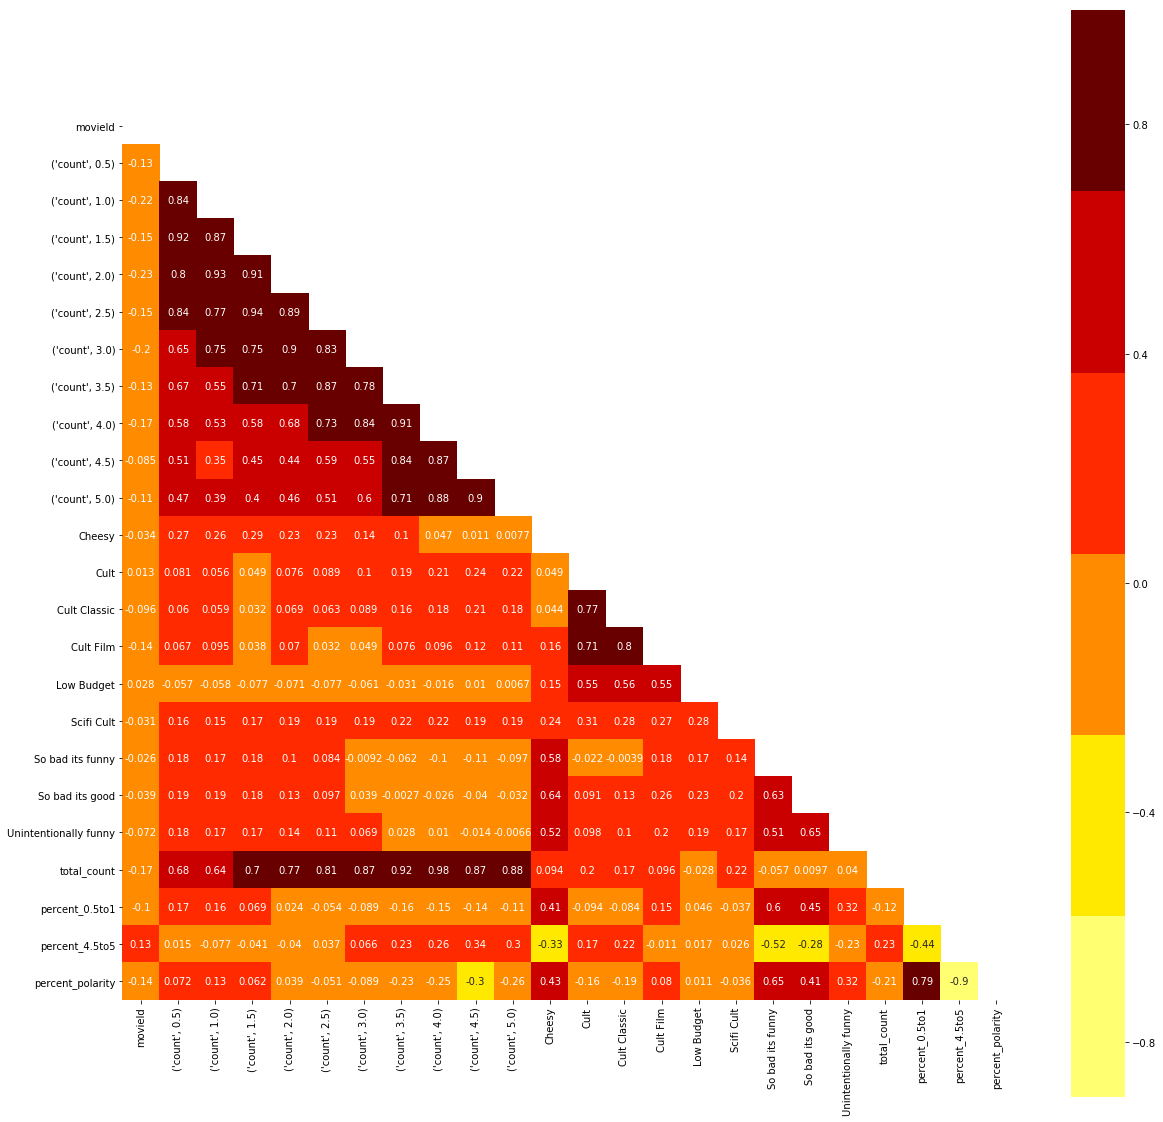

In [80]:
heatmap_corr(g_tag_test)

In [81]:
g_tag_test.genres.value_counts()

Drama                                                             1755
Comedy                                                            1165
Comedy|Drama                                                       631
Drama|Romance                                                      517
Documentary                                                        490
Comedy|Romance                                                     432
Comedy|Drama|Romance                                               349
Horror                                                             272
Drama|Thriller                                                     249
Horror|Thriller                                                    217
Crime|Drama                                                        193
Crime|Drama|Thriller                                               167
Drama|War                                                          161
Thriller                                                           122
Comedy

In [92]:
g_tag_test.describe()

,movieId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5,percent_polarity,total_tails
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.00000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,39970.868549,32.205070,66.242107,32.641014,138.490893,101.587583,413.346160,253.584624,556.950213,178.522162,307.286430,0.092009,0.125118,0.246457,0.28432,0.127759,0.059628,0.291982,0.035529,0.037644,2080.856254,0.073002,0.164994,-0.091992,0.237995
std,48151.129249,78.729075,177.559421,78.772207,336.595566,225.521414,1113.055995,620.117198,1648.780105,662.794569,1426.070242,0.106802,0.133213,0.200088,0.15842,0.151946,0.075956,0.164562,0.058301,0.055112,5655.243811,0.080848,0.111613,0.164058,0.105228
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007250,0.006250,0.018000,0.06175,0.007000,0.004750,0.051000,0.003000,0.005250,48.000000,0.000000,0.000000,-0.724502,0.015152
25%,3680.750000,2.000000,3.000000,2.000000,8.000000,8.000000,22.000000,17.000000,22.000000,6.000000,7.000000,0.030000,0.041000,0.110750,0.17925,0.041750,0.028500,0.169750,0.011750,0.014000,118.000000,0.026316,0.076610,-0.196429,0.162431
50%,7880.000000,6.000000,10.000000,6.000000,24.000000,21.000000,66.000000,45.000000,69.000000,18.000000,24.000000,0.052125,0.075500,0.171750,0.23475,0.072625,0.039000,0.239250,0.018250,0.020000,345.000000,0.046220,0.140968,-0.091985,0.217949
75%,71249.000000,22.000000,48.000000,24.000000,104.250000,77.000000,277.250000,168.000000,307.250000,80.000000,111.000000,0.107000,0.155750,0.306875,0.33400,0.142250,0.057500,0.372250,0.034500,0.036500,1354.000000,0.086957,0.230769,0.000000,0.292553
max,187595.000000,1132.000000,4339.000000,1219.000000,5687.000000,3016.000000,22333.000000,7373.000000,28340.000000,14110.000000,48762.000000,0.847000,0.968000,0.994500,0.99325,0.988250,1.000000,0.952500,0.897500,0.806750,97999.000000,0.848739,0.746776,0.827731,0.913043


In [106]:
g_tag_test.loc[g_tag_test['So bad its good'] > 0.3]

,movieId,title,genres,imdbId,tmdbId,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5,percent_polarity,total_tails
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy,tt0113855,9312,690.0,1485.0,650.0,2142.0,977.0,3965.0,776.0,1660.0,151.0,602.0,0.58100,0.09025,0.28000,0.31800,0.18800,0.08625,0.49400,0.43725,0.28500,13098.0,0.166056,0.057490,0.108566,0.223546
163,173,Judge Dredd (1995),Action|Crime|Sci-Fi,tt0113492,9482,655.0,2204.0,757.0,3394.0,1233.0,5710.0,773.0,1840.0,112.0,453.0,0.49850,0.08525,0.23050,0.40275,0.04875,0.07550,0.43925,0.37875,0.06450,17131.0,0.166890,0.032981,0.133909,0.199872
183,193,Showgirls (1995),Drama,tt0114436,10802,671.0,2095.0,465.0,1712.0,519.0,1919.0,360.0,684.0,109.0,403.0,0.27775,0.11475,0.53075,0.74225,0.06100,0.03350,0.79425,0.70075,0.31675,8937.0,0.309500,0.057290,0.252210,0.366790
313,327,Tank Girl (1995),Action|Comedy|Sci-Fi,tt0114614,9067,394.0,1057.0,257.0,1235.0,474.0,2161.0,644.0,1365.0,219.0,660.0,0.35700,0.28825,0.75925,0.87900,0.21600,0.07850,0.61550,0.45325,0.04450,8466.0,0.171391,0.103827,0.067564,0.275219
685,747,"Stupids, The (1996)",Comedy,tt0117768,16299,46.0,365.0,23.0,214.0,27.0,249.0,20.0,132.0,2.0,98.0,0.10250,0.10750,0.30800,0.32350,0.11100,0.03825,0.82200,0.41350,0.03025,1176.0,0.349490,0.085034,0.264456,0.434524
942,1037,"Lawnmower Man, The (1992)",Action|Horror|Sci-Fi|Thriller,tt0104692,10163,203.0,794.0,232.0,1549.0,505.0,2464.0,500.0,1200.0,108.0,281.0,0.41500,0.14125,0.27525,0.61350,0.34625,0.30350,0.54525,0.33650,0.34450,7836.0,0.127233,0.049643,0.077591,0.176876
1132,1255,Bad Taste (1987),Comedy|Horror|Sci-Fi,tt0092610,9964,41.0,118.0,40.0,145.0,117.0,409.0,327.0,603.0,170.0,268.0,0.29300,0.80825,0.99425,0.98050,0.96300,0.60725,0.71075,0.33775,0.06975,2238.0,0.071046,0.195710,-0.124665,0.266756
1185,1311,Santa with Muscles (1996),Comedy,tt0117550,31388,9.0,63.0,3.0,17.0,2.0,16.0,1.0,6.0,0.0,47.0,0.24975,0.03275,0.09725,0.24875,0.03275,0.04525,0.47425,0.36900,0.05675,164.0,0.439024,0.286585,0.152439,0.725610
1350,1499,Anaconda (1997),Action|Adventure|Thriller,tt0118615,9360,656.0,1420.0,589.0,1731.0,590.0,1229.0,300.0,432.0,51.0,108.0,0.69450,0.07375,0.24100,0.31050,0.27375,0.05000,0.86575,0.31100,0.54150,7106.0,0.292147,0.022375,0.269772,0.314523
1395,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,tt0118688,415,973.0,2140.0,913.0,2358.0,1098.0,2304.0,650.0,820.0,102.0,211.0,0.66250,0.04250,0.12500,0.25275,0.04225,0.02825,0.74875,0.33050,0.22150,11569.0,0.269081,0.027055,0.242026,0.296136


In [170]:
g_tag_test.to_csv('first_ml_dataset.csv')

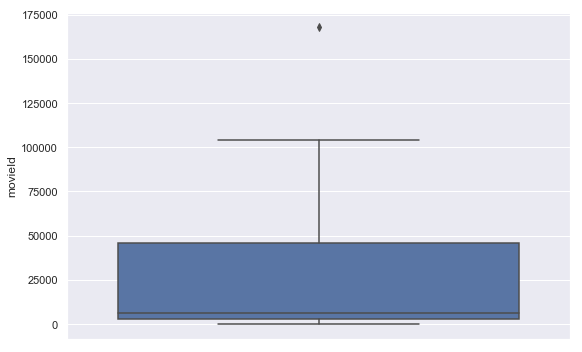

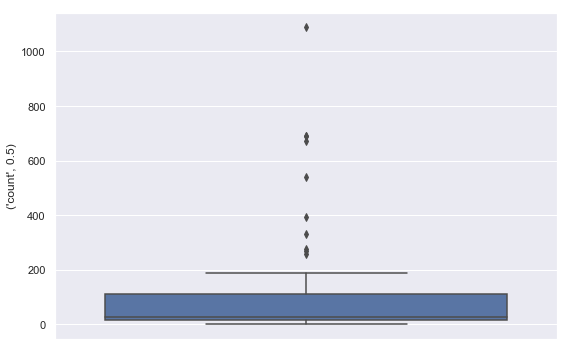

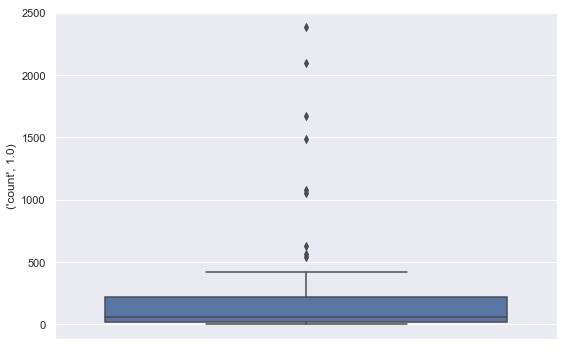

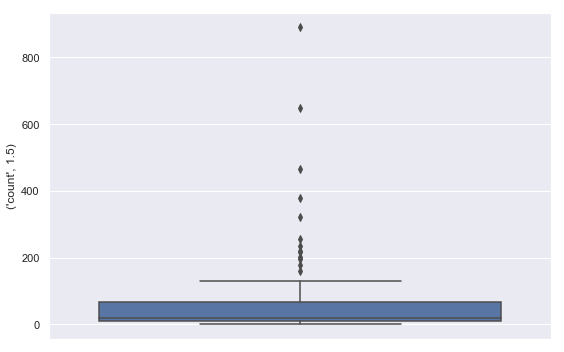

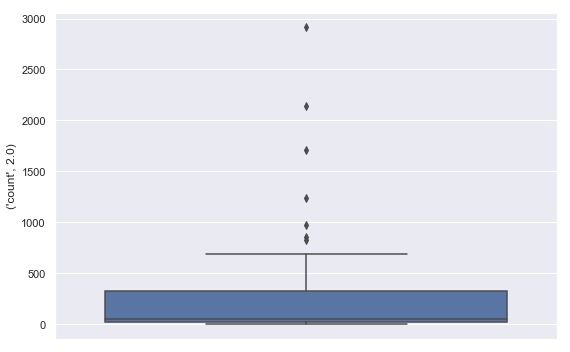

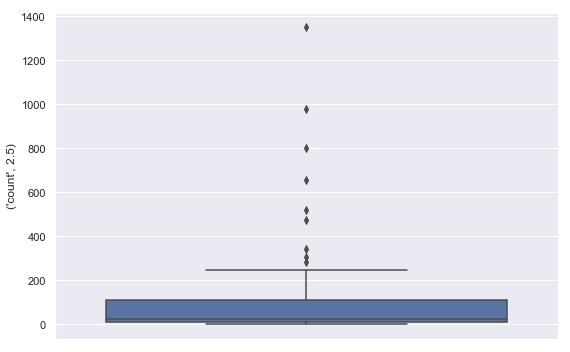

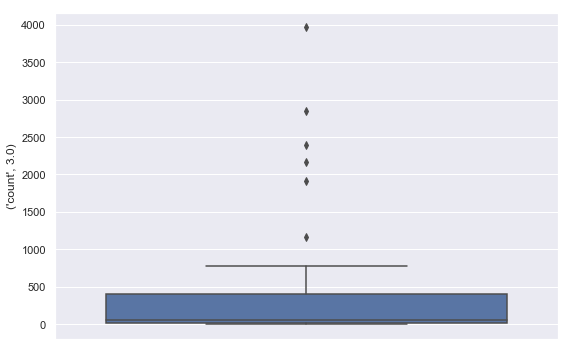

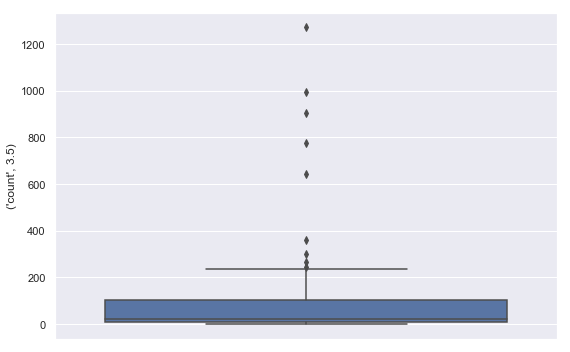

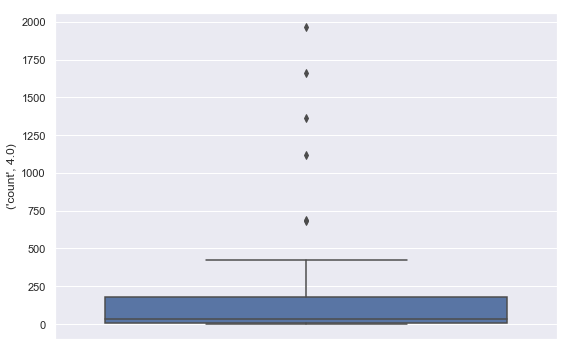

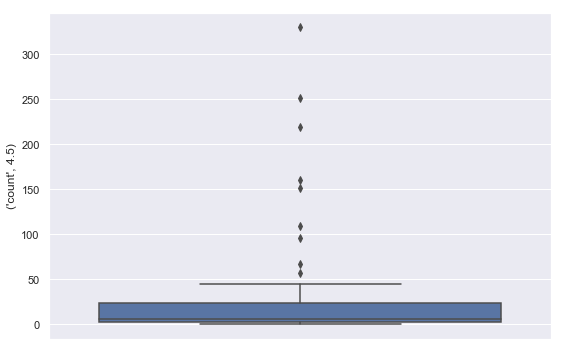

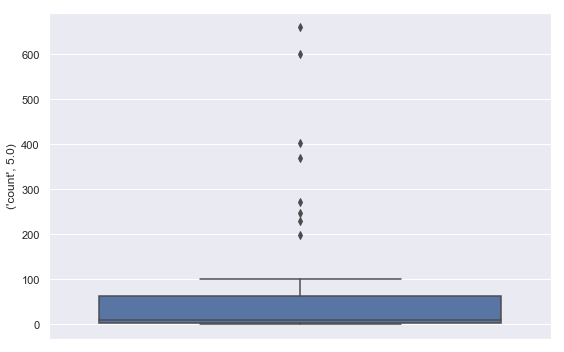

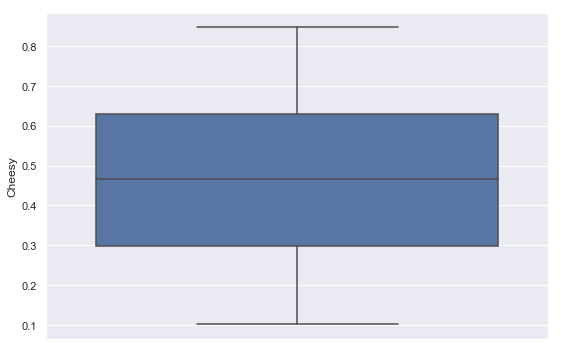

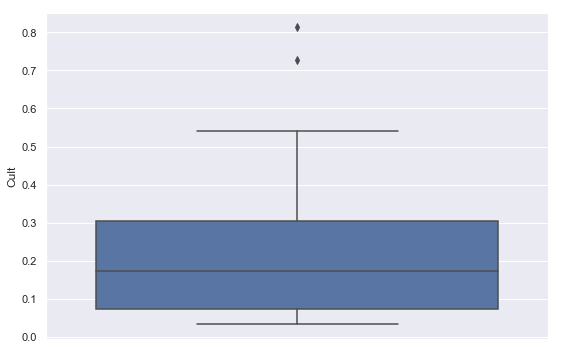

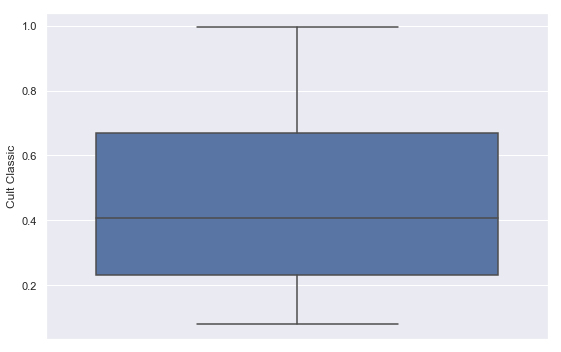

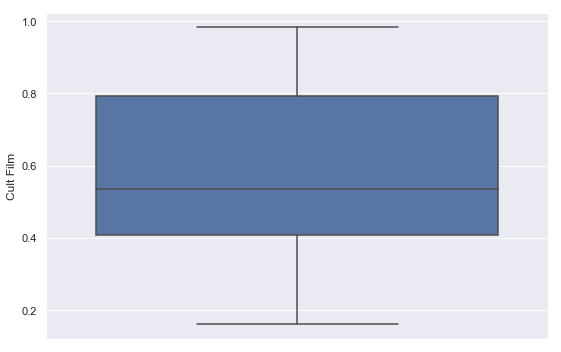

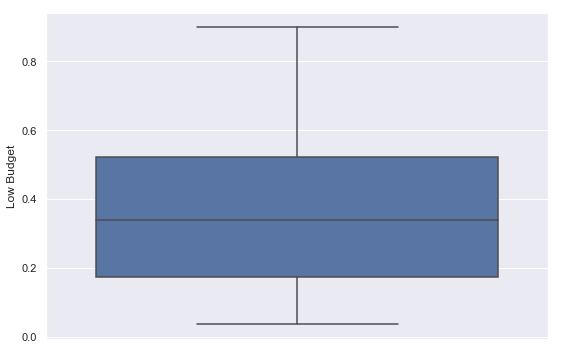

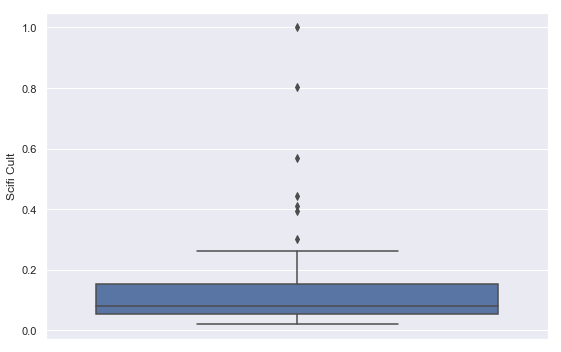

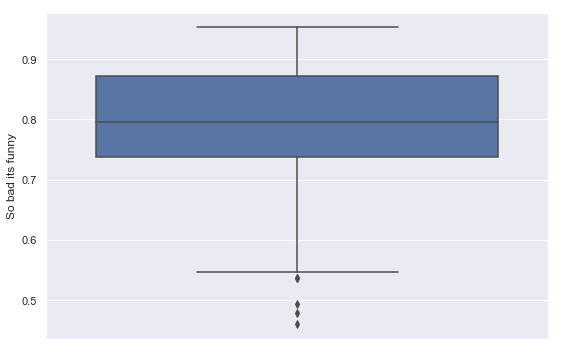

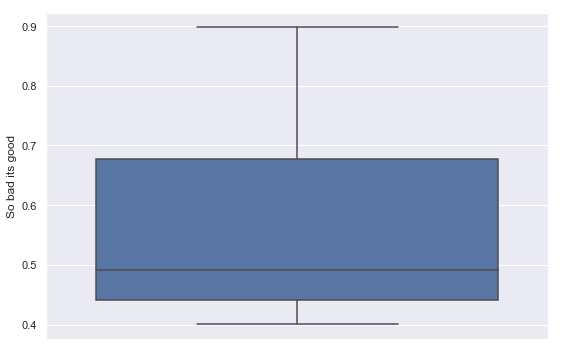

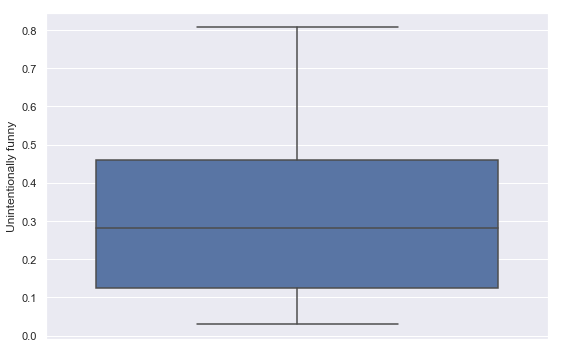

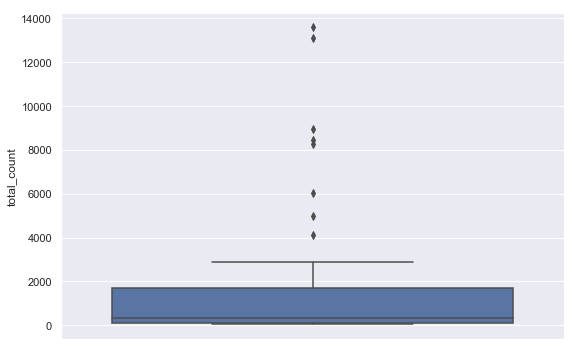

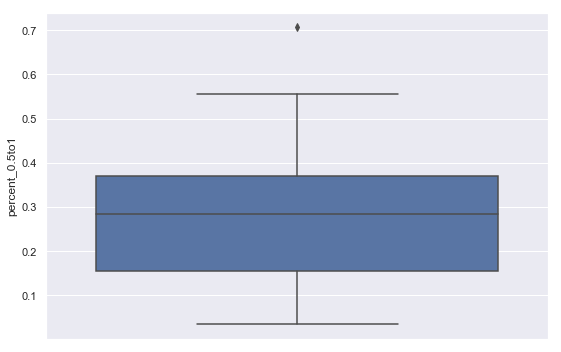

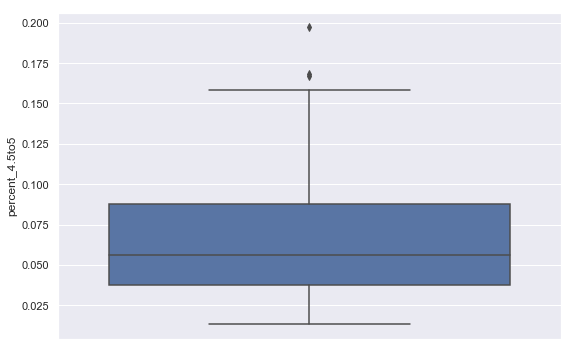

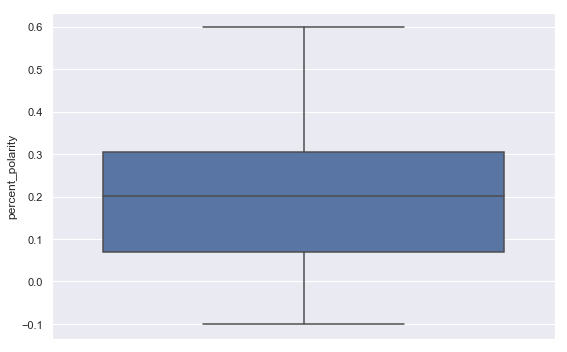

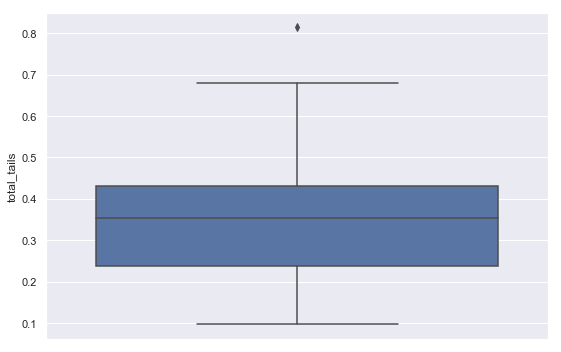

In [119]:
sns.set(rc={'figure.figsize':(9,6)})
for col in so_bad_its_good:
    ax = sns.boxplot(so_bad_its_good[col], orient='v')
    plt.show()

In [155]:
counts = []
columns = [('count', 0.5),('count', 1.0),('count', 1.5),
           ('count', 2.0),('count', 2.5),('count', 3.0),          
           ('count', 3.5),('count', 4.0),('count', 4.5),
           ('count', 5.0)]

for col in columns:
    counts.append(g_tag_test[col].sum())
counts

[424334.0,
 872806.0,
 430078.0,
 1824756.0,
 1338518.0,
 5446249.0,
 3341231.0,
 7338376.0,
 2352208.0,
 4048806.0]

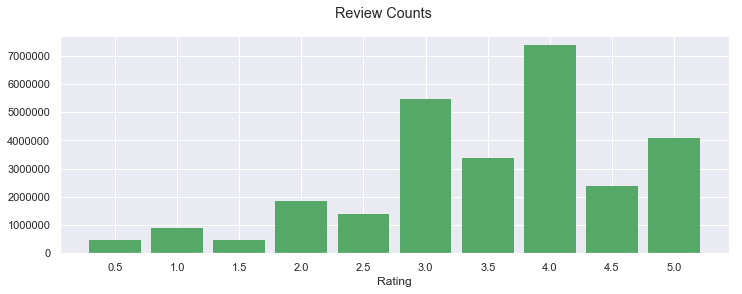

In [169]:
names = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
values = counts

plt.figure(figsize=(12, 4))

plot = plt.bar(names, values)
plt.setp(plot,color='g', linewidth=2.0)
plt.suptitle('Review Counts')
plt.xlabel('Rating')
plt.show();

In [175]:
g_tag_test.max()

movieId                                                     187595
title                    À nous la liberté (Freedom for Us) (1931)
genres                                                     Western
imdbId                                                   tt7808620
(count, 0.5)                                                  1132
(count, 1.0)                                                  4339
(count, 1.5)                                                  1219
(count, 2.0)                                                  5687
(count, 2.5)                                                  3016
(count, 3.0)                                                 22333
(count, 3.5)                                                  7373
(count, 4.0)                                                 28340
(count, 4.5)                                                 14110
(count, 5.0)                                                 48762
Cheesy                                                       0

### An exercise in clustering.

In [173]:
cluster_df = g_tag_test.drop(['title', 'genres','imdbId','tmdbId'],axis=1)
cluster_df.set_index('movieId', inplace=True)
cluster_df.head()

,"(count, 0.5)","(count, 1.0)","(count, 1.5)","(count, 2.0)","(count, 2.5)","(count, 3.0)","(count, 3.5)","(count, 4.0)","(count, 4.5)","(count, 5.0)",Cheesy,Cult,Cult Classic,Cult Film,Low Budget,Scifi Cult,So bad its funny,So bad its good,Unintentionally funny,total_count,percent_0.5to1,percent_4.5to5,percent_polarity,total_tails
movieId,,,,,,,,,,,,,,,,,,,,,,,,
1,478.0,840.0,468.0,2160.0,1665.0,11872.0,6095.0,22710.0,5684.0,16497.0,0.07500,0.21400,0.30725,0.21925,0.07300,0.11750,0.13650,0.01150,0.01875,68469.0,0.019250,0.323957,-0.304707,0.343206
2,276.0,813.0,542.0,2551.0,1902.0,8711.0,3116.0,6303.0,790.0,2139.0,0.19625,0.11075,0.11025,0.19675,0.04200,0.04500,0.28000,0.02125,0.04200,27143.0,0.040121,0.107910,-0.067789,0.148031
3,174.0,777.0,237.0,1677.0,629.0,6227.0,774.0,3440.0,159.0,1491.0,0.06900,0.04100,0.10225,0.17550,0.02775,0.04600,0.22900,0.03375,0.03425,15585.0,0.061020,0.105871,-0.044851,0.166891
4,48.0,352.0,31.0,497.0,77.0,1136.0,68.0,557.0,12.0,211.0,0.07775,0.04275,0.10675,0.21600,0.05475,0.02800,0.28075,0.01600,0.03725,2989.0,0.133824,0.074607,0.059217,0.208431
5,248.0,802.0,282.0,1737.0,681.0,6655.0,761.0,2989.0,174.0,1145.0,0.08750,0.02750,0.08375,0.17825,0.02875,0.02925,0.24200,0.01750,0.03850,15474.0,0.067856,0.085240,-0.017384,0.153096


In [181]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans
from sklearn import metrics